# Options strategies
> Link and notes that may be helpful for interview prep.

- toc: true
- branch: master
- badges: true
- comments: true
- author: Stephen Zagar
- categories: [job, interview, notes, options, trading]

### Spread strategies
* selling verticle call spreads and verticle put spreads (credit spreads)
  * take advantage of time decay
  * don't have to choose direction
* **bull call spread**
  * simultaneously buys calls at a specific strike price while also selling the same number of calls at a higher strike price.
  * expects a moderate rise in the price of the asset
  * reduce premium spent, limited upside
  * 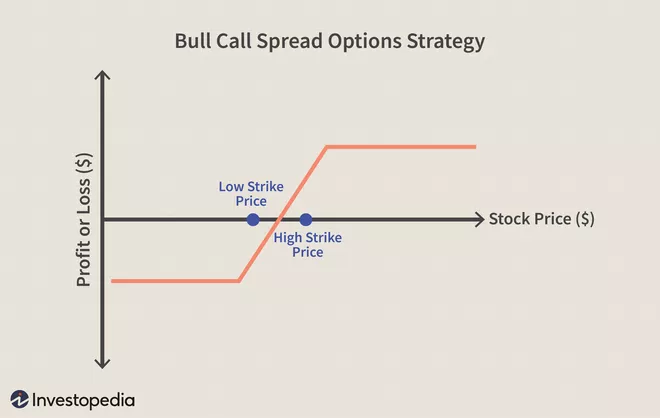

### **strangle options strategy**
* take advantage of volatility
* long strangle
  * buying both a call and a put
    * same underlying
    * expiration date
    * different exercise prices 
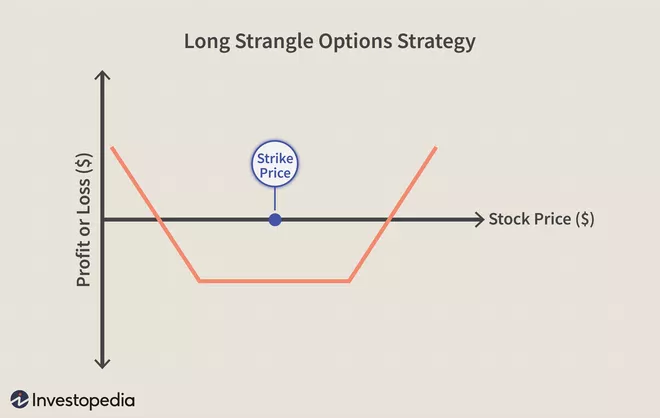


### **straddle**
* purchase of a put and call
  * same expiration date
  * same strike price
  * same underlying security
* profit: when the stock either rises or falls from the strike price by more than the total premium paid.

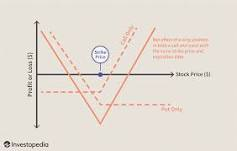

In [91]:
#from functools import lru_cache

#@lru_cache
def f(n: int, memo: dict) -> int:
    #print(f"f({n})")
    if n == 1: return 0
    if n in memo: return memo[n]
    if n in (3,2): return 1
    nsteps = f(n-1, memo)
    if n%3 == 0:
        nsteps = min(nsteps, f(n//3, memo))
    if n%2 == 0:
        nsteps = min(nsteps, f(n//2, memo))
    #print(nsteps)
    memo[n] = nsteps + 1
    return memo[n]
print(f(1000, {}))



9

In [122]:
def f(n: int, memo: list[int]) -> int:
    if n == 1: return 0
    if memo[n]: return memo[n]
    if n in (3,2): return 1
    nsteps = f(n-1, memo)
    if n%3 == 0:
        nsteps = min(nsteps, f(n//3, memo))
    if n%2 == 0:
        nsteps = min(nsteps, f(n//2, memo))
    #print(nsteps)
    memo[n] = nsteps + 1
    return memo[n]

n = 10
memo = [None] * (n+1)
print(f(n, memo))


3

##### via tabulation

In [127]:
def f(n: int) -> int:
    tbl = [n] * (n+1)
    tbl[1] = 0
    print(tbl)
    for tbl_idx in range(1,n):
        print(f"tbl_idx={tbl_idx}")
        tbl[tbl_idx+1] = min(tbl[tbl_idx+1], tbl[tbl_idx] + 1)
        
        if tbl_idx*2 <= n and tbl[tbl_idx*2]%2 == 0:
            tbl[tbl_idx*2] = min(tbl[tbl_idx*2], tbl[tbl_idx] + 1)
        if tbl_idx*3 <= n and tbl[tbl_idx*3]%3 == 0:
            tbl[tbl_idx*3] = min(tbl[tbl_idx*3], tbl[tbl_idx] + 1)
        print(tbl)
    return tbl[n]

print( f(6) )

[6, 0, 6, 6, 6, 6, 6]

tbl_idx=1

[6, 0, 1, 1, 6, 6, 6]

tbl_idx=2

[6, 0, 1, 1, 2, 6, 2]

tbl_idx=3

[6, 0, 1, 1, 2, 6, 2]

tbl_idx=4

[6, 0, 1, 1, 2, 3, 2]

tbl_idx=5

[6, 0, 1, 1, 2, 3, 2]

2

#### Initialize array

In [13]:
ar = [[r*c for c in range(1,5)] for r in range(1,3)]

In [14]:
ar

[[1, 2, 3, 4], [2, 4, 6, 8]]

#### Target Sum (tabulation)

In [32]:
def target_sum(tgt: int, arr: list[int]) -> bool:
    sums = [False] * (tgt+1)
    sums[0] = True
    for s in range(len(sums)):
        if not sums[s]:
            continue
        for value in arr:
            new_sum = s+value
            #if new_sum == tgt:
            #    return True
            if new_sum > tgt:
                continue
            sums[new_sum] = True
            print(sums)
    return sums[tgt]

print(target_sum(7, [5,3,4]))

[True, False, False, False, False, True, False, False]
[True, False, False, True, False, True, False, False]
[True, False, False, True, True, True, False, False]
[True, False, False, True, True, True, True, False]
[True, False, False, True, True, True, True, True]
[True, False, False, True, True, True, True, True]
True


### how_sum (tabulation)
* how_sum(target_sum, numbers)
* return an array containing any combination of elements taht add up to target_sum
* if there is no combination that adds to target_sum, then return null
* if there are multiple combinations, return any single combo
* how_sum(7, [5, 3, 4]) -> [4, 3]

In [22]:
#from collections import defaultdict
from rich import print

def how_sum(target_sum: int, numbers: list[int]) -> list[int]:
    #sums = defaultdict(list)
    sums = {_: [] for _ in range(target_sum+1)}
    #sums = {_: None for _ in range(target_sum+1)}
    sums[0] = [[]]
    for sum in sums.keys():
        if not sums[sum]:
            continue
        for number in numbers:
            new_sum = number+sum
            if new_sum > target_sum:
                continue
            for prev_sum in sums[sum]:
                if prev_sum is None: continue
                params = prev_sum.copy()
                params.append(number)
                sums[new_sum].append(params)
                break
            #print(sums)
            
    return sums[target_sum][0] if sums[target_sum] else None

In [28]:
print(how_sum(121, [5,4,3]))

[3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

#### best_sum (tabulation)
* best_sum(target_sum, numbers) -> list[int]
* returns array containing shortest combonation of numbers that sum to target_sum
* if there's a tie, return either

In [45]:
def best_sum(target_sum: int, numbers: list[int]) -> list[int]:
    #sums = {_: [] for _ in range(target_sum+1)}
    sums = {_: None for _ in range(target_sum+1)}
    sums[0] = []
    for sum in sums.keys():
        if sums[sum] is None:
            continue
        for number in numbers:
            new_sum = number+sum
            if new_sum > target_sum:
                continue
            #prev_sum = sums[sum]
            #    if prev_sum is None: continue
            params = sums[sum].copy()
            params.append(number)
            if not sums[new_sum] or len(params) < len(sums[new_sum]):
                sums[new_sum] = params
            #print(sums)
            
    return sums[target_sum] if sums[target_sum] else None

In [59]:
rslt = best_sum(1000, [5,4,6,7,8,9,10,14,17,23])
print(len(rslt),rslt)

44
[
    17,
    17,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23,
    23
]

#### can_construnct (tabulation)
* can_construct(target: str, word_bank: list[str]) -> bool:
* return true if target can be constructed from strings in word_bank
* may reuse elements
* can_construct('abcdef', ['ab', 'abc', 'cd', 'def', 'abcd']) --> True

In [76]:
def can_construct(target: str, word_bank: list[str]) -> bool:
    # 0 1 2 3 4 5
    # a b c d e 
    # ^
    tbl = [False] * (len(target)+1)
    tbl[0] = True
    for tbl_idx in range(len(target)+1):
        if not tbl[tbl_idx]:
            print("skip")
            continue
        for w in word_bank:
            n = len(w)
            print(f"slice: {target[tbl_idx:tbl_idx+n]} n={n} w={w}")
            if target[tbl_idx:tbl_idx+n] == w:
                tbl[tbl_idx+n] = True
                print(tbl)
            if tbl[-1]:
                return True
    return False
rslt = can_construct('abcdef', ['ab', 'abc', 'cd', 'def', 'abcd'])
rslt
            

slice: ab n=2 w=ab

[True, False, True, False, False, False, False]

slice: abc n=3 w=abc

[True, False, True, True, False, False, False]

slice: ab n=2 w=cd

slice: abc n=3 w=def

slice: abcd n=4 w=abcd

[True, False, True, True, True, False, False]

skip

slice: cd n=2 w=ab

slice: cde n=3 w=abc

slice: cd n=2 w=cd

[True, False, True, True, True, False, False]

slice: cde n=3 w=def

slice: cdef n=4 w=abcd

slice: de n=2 w=ab

slice: def n=3 w=abc

slice: de n=2 w=cd

slice: def n=3 w=def

[True, False, True, True, True, False, True]

True

#### can_construnct w/ count (tabulation)
* can_construct(target: str, word_bank: list[str]) -> int:
* return number of ways target can be constructed from strings in word_bank
* may reuse elements
* can_construct('abcdef', ['ab', 'abc', 'cd', 'def', 'abcd']) --> n

In [100]:
def can_construct(target: str, word_bank: list[str]) -> int:
    # a b c d e f _   len = 6
    # 0 1 2 3 4 5 6
    # ^               ""
    #   ^             "a" 
    #             ^   "abcdef"
    # 1 0 0 0 0 0
    # 1 0 1 0 0 0     "ab"       = curr + prev
    # 1 0 1 0 1 0     "cd"
    # 1 0 1 0 2 0     "abcd"
    tbl = [False] * (len(target)+1)
    tbl = [0] * (len(target)+1)
    tbl[0] = 1
    for tbl_idx in range(len(target)+1):
        if tbl[tbl_idx] == 0:
            continue
        for wd in word_bank:
            wd_len = len(wd)
            if target[tbl_idx:tbl_idx+wd_len] == wd:
                tbl[tbl_idx+wd_len] += tbl[tbl_idx]
                #if tbl_idx == 0: tbl[tbl_idx+wd_len] -= 1
    #print(tbl)
    return tbl[-1]

rslt = can_construct('purple', ['purp', 'p', 'ur', 'le', 'purpl'])
print(rslt)
assert rslt == 2
rslt = can_construct('abcdef', ['ab', 'abc', 'cd', 'def', 'abcd'])
print(rslt)
assert rslt == 1
rslt = can_construct('skateboard', ['bo', 'rd', 'ate', 't', 'ska', 'sk', 'boar'])
print(rslt)
assert rslt == 0
rslt = can_construct('enterapotentpot', ['a', 'p', 'ent', 'enter', 'ot', 'o', 't'])
print(rslt)
assert rslt == 4

2

1

0

4

#### can_construnct w/ details (tabulation)
* can_construct(target: str, word_bank: list[str]) -> list[str]:
* return combinations of words target can be constructed from strings in word_bank
* may reuse elements
* can_construct('abcdef', ['ab', 'abc', 'cd', 'def', 'abcd']) --> [['ab','cd','def'],['abc','def'], ...]

##### notes
* initialize: tbl = [[] for  _ in range(len(target)+1)]tbl = [[] for  _ in range(len(target)+1)]
* append does not return list

In [51]:
from rich import print
def can_construct(target: str, word_bank: list[str]) -> list[str]:
    tbl = [[] for  _ in range(len(target)+1)]
    tbl[0] = [[]]
    for tbl_idx in range(len(target)+1):
        if not len(tbl[tbl_idx]):
            continue
        for wd in word_bank:
            wd_len = len(wd)
            if target[tbl_idx:tbl_idx+wd_len] == wd:
                for base_arr in tbl[tbl_idx]:
                    tbl[tbl_idx+wd_len].append(base_arr.copy())
                    tbl[tbl_idx+wd_len][-1].append(wd)
    return tbl[-1]

rslt = can_construct('abcdef', ['ab', 'abc', 'cd', 'def', 'abcd', 'ef', 'c'])
print(rslt)

[['abc', 'def'], ['ab', 'c', 'def'], ['abcd', 'ef'], ['ab', 'cd', 'ef']]

In [48]:
rslt = can_construct('enterapotentpot', ['a', 'p', 'ent', 'enter', 'ot', 'o', 't'])
rslt

[['enter', 'a', 'p', 'ot', 'ent', 'p', 'ot'],
 ['enter', 'a', 'p', 'o', 't', 'ent', 'p', 'ot'],
 ['enter', 'a', 'p', 'ot', 'ent', 'p', 'o', 't'],
 ['enter', 'a', 'p', 'o', 't', 'ent', 'p', 'o', 't']]

In [47]:
rslt = can_construct('', ['a', 'p', 'ent', 'enter', 'ot', 'o', 't'])
rslt

[[]]

In [46]:
rslt = can_construct('XX', ['a', 'p', 'ent', 'enter', 'ot', 'o', 't'])
rslt

[]